In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing the neccessary library for the project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SPAM text message 20170820 - Data.csv', delimiter=',')
data = raw_data.copy()
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


**Define target and input variable**

In [ ]:
inputs = data['Message']
target = data['Category']


In [ ]:
inputs.shape, target.shape

((5572,), (5572,))

**Label the input varible using label encoding**

In [ ]:
#importing label encoding for labeling
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
data['Target'] = label.fit_transform(target)
data


,Category,Message,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
data = data.drop('Category', axis = 1) #dropping the category column

**checking for any missing values**

In [ ]:
#checking for missing values from data
data.isnull().sum()


Message    0
Target     0
dtype: int64

**checking duplicate values**

In [ ]:
#checking for duplicate values in the dataset
data.duplicated().sum()

415

In [ ]:
#removing duplicate values from the dataset
data_checkpoint = data.drop_duplicates(keep = 'first')
#checking the shape of the dataset
data_checkpoint.shape

(5157, 2)

**Exploratory Data Analysis**

In [ ]:
value = data_checkpoint['Target'].value_counts()
total = value.sum()

percentage_ham = (value[0]/total) * 100 #calculating the ham message percentage in the dataset
percentage_spam = (value[1]/total) * 100 #calculating spam message percentage in the dataset

percentage_ham, percentage_spam

(87.5702928058949, 12.429707194105099)

<Figure size 2000x500 with 0 Axes>

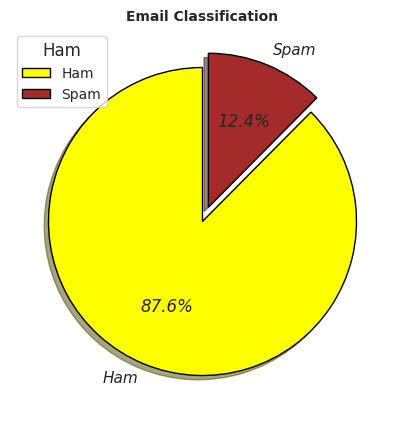

In [ ]:
#creating visualisation chart
fig = plt.figure(figsize = (20, 5))

wedgeprop = {'linewidth':1, 'edgecolor':'black', 'antialiased':True}
color = ['yellow', 'brown']
label = ['Ham', 'Spam']
textprops = {'fontstyle':'italic'}
explode = (0,0.1)


fig = plt.figure(figsize=(20, 5))

# Create the pie chart
plt.pie(value, colors=color, wedgeprops=wedgeprop, autopct="%0.1f%%", labels=label, startangle=90, explode=explode, shadow=True, textprops=textprops)

# Add the legend
plt.legend(title='Ham', loc='upper left', fontsize='small')

# Add the title
plt.title('Email Classification', fontsize='small', fontweight='bold')

# Show the pie chart
plt.show()

**Word structure**









In [ ]:
#import NLTK for natural language processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') #downloading stopwords
nltk.download('punkt') #downloading punkt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_checkpoint.columns.values

array(['Message', 'Target'], dtype=object)

In [ ]:
data_checkpoint_rearrange = ['Target', 'Message']
data_checkpoint = data_checkpoint[data_checkpoint_rearrange]

In [ ]:
data_checkpoint

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
data_checkpoint['num_chrt'] = data_checkpoint['Message'].apply(len) #length of each message
data_checkpoint['num_words'] = data_checkpoint['Message'].apply(lambda x: len(nltk.word_tokenize(x))) #applying tokenize to each word in the dataset
data_checkpoint['num_senten'] = data_checkpoint['Message'].apply(lambda x: len(nltk.sent_tokenize(x))) #applying tokenize to each semtence in the dataset

<ipython-input-70-a136007ac979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_checkpoint['num_chrt'] = data_checkpoint['Message'].apply(len) #length of each message


In [ ]:
data_checkpoint

,Target,Message,num_chrt,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
data_checkpoint.describe()

,Target,num_chrt,num_words,num_senten
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


**statistics of valid messages (Ham)**

In [ ]:
data_checkpoint

,Target,Message,num_chrt,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
data_checkpoint[data_checkpoint['Target'] == 0][['num_chrt', 'num_words', 'num_senten']].describe()

,num_chrt,num_words,num_senten
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


**Statistics of invalid messages (Spam)**

In [ ]:
data_checkpoint[data_checkpoint['Target'] == 1][['num_chrt', 'num_words', 'num_senten']].describe()

,num_chrt,num_words,num_senten
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

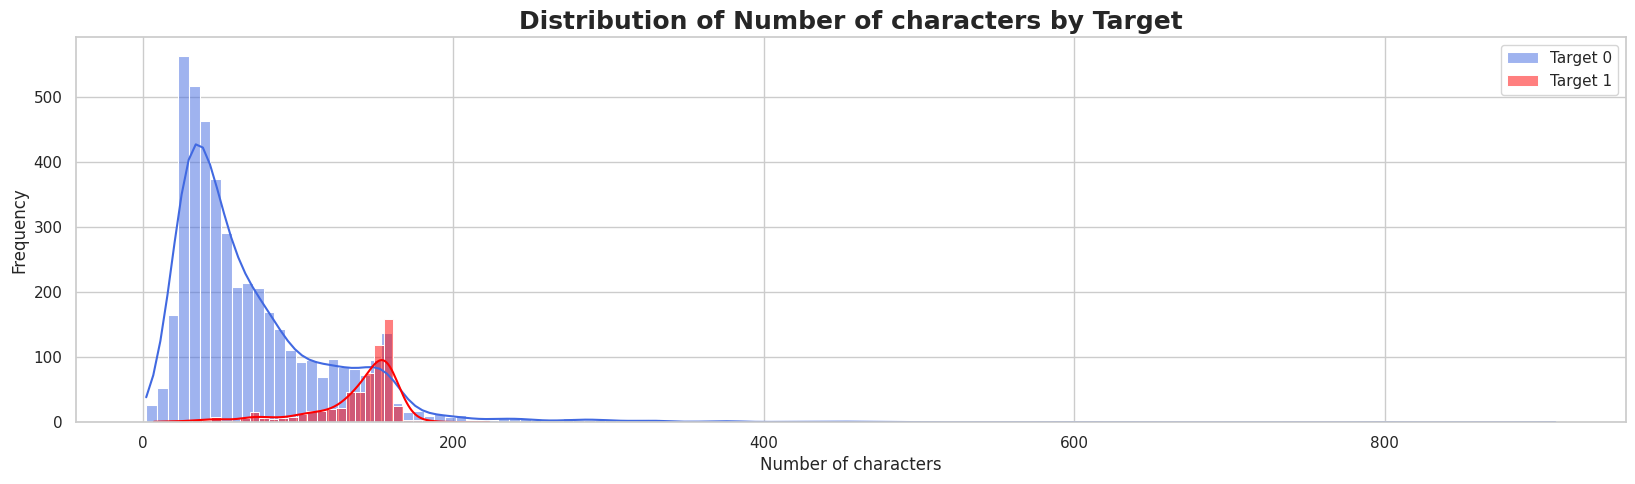

In [ ]:
#creating figure and setting the figure size
plt.figure(figsize=(20, 5))

#ploting hsitogram for Ham messages
sns.histplot(data_checkpoint[data_checkpoint['Target'] == 0]['num_chrt'], color = 'Royalblue', label = 'Target 0', kde = True)
#ploting hsitogram for Spam messages
sns.histplot(data_checkpoint[data_checkpoint['Target'] == 1]['num_chrt'], color = 'red', label = 'Target 1', kde = True)


plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of characters by Target', fontsize= 18, fontweight = 'bold')
plt.legend() #adds legend
sns.set(style='whitegrid') #adds a white grid background
plt.show() #show the plot




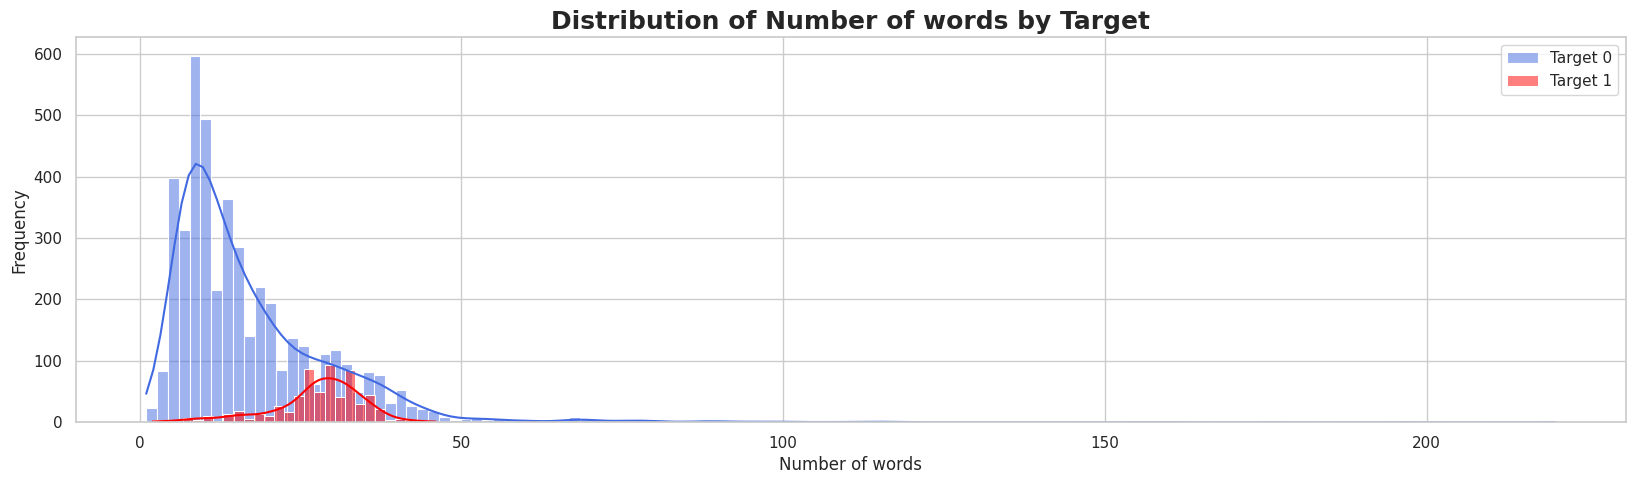

In [ ]:
#creating figure and setting the figure size
plt.figure(figsize=(20, 5))

#ploting hsitogram for Ham messages
sns.histplot(data_checkpoint[data_checkpoint['Target'] == 0]['num_words'], color = 'Royalblue', label = 'Target 0', kde = True)
#ploting hsitogram for Spam messages
sns.histplot(data_checkpoint[data_checkpoint['Target'] == 1]['num_words'], color = 'red', label = 'Target 1', kde = True)


plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of words by Target', fontsize= 18, fontweight = 'bold')
plt.legend() #adds legend
sns.set(style='whitegrid') #adds a white grid background
plt.show() #show the plot




**coorrelation**

In [ ]:
data_checkpoint[['Target', 'num_chrt', 'num_words', 'num_senten']].corr()

,Target,num_chrt,num_words,num_senten
Target,1.000000,0.374409,0.255968,0.259023
num_chrt,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_senten,0.259023,0.622428,0.679396,1.000000


In [ ]:


#importing the porter stemmer for text stemming
from nltk.stem.porter import PorterStemmer

#importing the string module to handle special characters
import string

#creating instance for PorterStemmer
porter = PorterStemmer()

#creating function to transform text to lowercase
def text_transformer(text):
  lower_text = text.lower()
  #tokenize using NLTK
  lower_text = nltk.word_tokenize(lower_text)

  #removing special characters
  special_chr = []
  for i in lower_text:
    if i.isalnum():
      special_chr.append(i)

  lower_text = special_chr[:]
  special_chr.clear()

  #looping through the tokens to remove stopwords and punctuations
  for i in lower_text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      special_chr.append(i)

    lower_text = special_chr[:]
    special_chr.clear()
    for i in lower_text:
      special_chr.append(porter.stem(i))

  #join the processed text into a single string
  return ' '.join(special_chr)


In [ ]:
text_transformer('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
data_checkpoint['transform_text'] = data_checkpoint['Message'].apply(text_transformer)
data_checkpoint

,Target,Message,num_chrt,num_words,num_senten,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,36,9,1,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth el next...


In [ ]:
data_text_trans = data_checkpoint.copy()

finding out the top 20 spam words

In [ ]:
spam_freq = []
for sentence in data_text_trans[data_text_trans['Target'] == 1]['transform_text'].tolist():
  for word in sentence.split():
    spam_freq.append(word)

In [ ]:
from collections import Counter
top_spam_words = pd.DataFrame(Counter(spam_freq).most_common(20))
top_spam_words
#viewing most common words and their frequency

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


finding top 20 words that are not spam

In [ ]:
ham_freq = []
for sentence in data_text_trans[data_text_trans['Target'] == 0]['transform_text'].tolist():
  for word in sentence.split():
    ham_freq.append(word)

In [ ]:
top_ham_words = pd.DataFrame(Counter(ham_freq).most_common(20))
top_ham_words
#viewing top 20 words and their frequency

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


**Building model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
count_vec = CountVectorizer() #converting text document to numerical representation

tfid_vec = TfidfVectorizer(max_features=3000) #Tfid converting to matrix of TF-IDF features

In [ ]:
inputs = tfid_vec.fit_transform(data_text_trans['transform_text']).toarray()
targets = data_text_trans['Target'].values

In [ ]:
#spliting the data accordingly
from sklearn.model_selection import train_test_split

In [ ]:
#spliting the dataset into train and test with train with 80% and test 20% of the data
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, random_state=350, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression #importing logistic regression
from sklearn.metrics import accuracy_score, precision_score #importing metrics to measure model accuracy and precision

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(x_train, y_train) #fitting the data

LogisticRegression()

In [ ]:
result = reg.predict(x_train)

In [ ]:
accuracy = accuracy_score(y_train, result)
precision = precision_score(y_train, result)

print(f'Accuracy: {accuracy}, Precision: {precision}') #return accuracy and precision of the model

Accuracy: 0.9672727272727273, Precision: 0.9792207792207792


In [ ]:
test_result = reg.predict(x_test)


In [ ]:
test_result

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#checking the accuracy and precision of the model
accuracy = accuracy_score(y_test, test_result)
precision = precision_score(y_test, test_result)

print(f'Accuracy: {accuracy}, Precision: {precision}')

Accuracy: 0.9515503875968992, Precision: 0.9887640449438202


**Conclusion**<br>
the model as seen is able to predict email spam with a 95% accuracy